In [46]:
# Dependencies and Setup
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
load_mouse_drug_data = "data/mouse_drug_data.csv"
trial_data_clinical = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
m_df = pd.read_csv(load_mouse_drug_data)
clinical_df = pd.read_csv(trial_data_clinical)

# Combine the data into a single dataset
merged_dataset = clinical_df.merge(m_df, how='outer', on='Mouse ID')

# Display the data table for preview
merged_dataset.head()
#display(merged_dataset["Mouse ID"].value_counts().head())



g989    26
k210    10
u327    10
j119    10
c766    10
Name: Mouse ID, dtype: int64

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


 ## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
t_avg = merged_dataset.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
t_avg_df = pd.DataFrame(t_avg)



In [3]:
# Preview DataFrame
t_avg_df



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tu_error = merged_dataset.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']
# Convert to DataFrame
tu_err_df = pd.DataFrame(tu_error)
# Preview DataFrame
tu_err_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames
reformat_data = t_avg_df.reset_index()
pivotting = reformat_data.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']

reformat_err = tu_err_df.reset_index()
pivot_err = reformat_err.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview that Reformatting worked
display(pivotting.head())



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


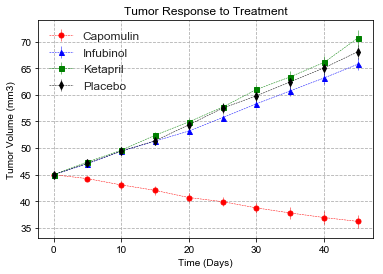

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 10)
x_limit = 45

plt.figure(figsize=(6,4))

plt.errorbar(pivotting.index, pivotting["Capomulin"], yerr=pivot_err["Capomulin"],             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotting.index, pivotting["Infubinol"], yerr=pivot_err["Infubinol"],             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotting.index, pivotting["Ketapril"],yerr=pivot_err["Ketapril"],             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(pivotting.index, pivotting["Placebo"],yerr=pivot_err["Placebo"],             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# plt.ylim(20, 80)
# plt.xlim(0, 45)

# Set x and y axis labels including the title of the chart

plt.title("Tumor Response to Treatment")# Give plot main title
plt.xlabel("Time (Days)") # set text for the x axis
plt.ylabel("Tumor Volume (mm3)") # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")

plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)

# Save the figure
plt.savefig("TumorResponseTreatment.png")



In [7]:
# Show the Figure
plt.show()


 ## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_avg = merged_dataset.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_avg_df = pd.DataFrame(meta_avg)



In [9]:
# Preview DataFrame
meta_avg_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_err = merged_dataset.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_err_df = pd.DataFrame(meta_err)



In [11]:
# Preview DataFrame
meta_err_df.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
# Minor Data Munging to Re-Format the Data Frames
mavg_reformat = meta_avg_df.reset_index()
m_avg_pivot = mavg_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

merr_reformat = meta_err_df.reset_index()
meror_pivot = merr_reformat.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']



In [16]:
# Preview that Reformatting worked
pivotting.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


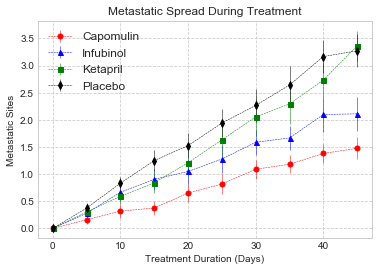

In [17]:
# Generate the Plot (with Error Bars)

plt.errorbar(m_avg_pivot.index, m_avg_pivot["Capomulin"], yerr=meror_pivot["Capomulin"],             color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(m_avg_pivot.index, m_avg_pivot["Infubinol"], yerr=meror_pivot["Infubinol"],             color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(m_avg_pivot.index, m_avg_pivot["Ketapril"],yerr=meror_pivot["Ketapril"],             color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(m_avg_pivot.index, m_avg_pivot["Placebo"],yerr=meror_pivot["Placebo"],             color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)


# Set x and y axis labels including the title of the chart
plt.title('Metastatic Spread During Treatment') # Give plot main title
plt.xlabel('Treatment Duration (Days)') # set text for the x axis
plt.ylabel('Metastatic Sites') # set text for the y axis

plt.style.use('seaborn-whitegrid')
plt.grid(linestyle="dashed")
plt.legend(loc='best', fontsize=12, fancybox=True)


# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")



In [18]:
# Show the Figure
plt.show()


 ## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = merged_dataset.groupby(["Drug", "Timepoint"]).count()['Mouse ID']

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count": mice_count})




In [20]:
# Preview DataFrame
mice_count_df.head()



Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [21]:
# Minor Data Munging to Re-Format the Data Frames
mice_reformat = mice_count_df.reset_index()
mice_pivot = mice_reformat.pivot(index='Timepoint', columns='Drug')['Mouse Count']



In [22]:
# Preview the Data Frame
mice_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


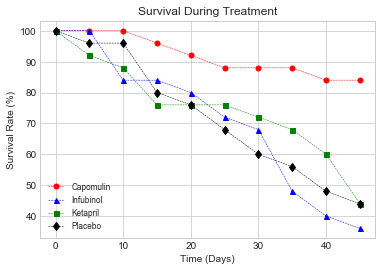

In [23]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mice_pivot["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)


plt.title("Survival During Treatment") # Give plot main title
plt.ylabel("Survival Rate (%)") # set text for the y axis
plt.xlabel("Time (Days)") # set text for the x axis
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")



In [24]:
# Show the Figure
plt.show()


 ## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
percent_change =  100 * (pivotting.iloc[-1] - pivotting.iloc[0]) / pivotting.iloc[0]
pct_change_sem =  100 * (pivot_err.iloc[-1] - pivot_err.iloc[0]) / pivot_err.iloc[0]



In [26]:
# Display the data to confirm
display(percent_change)



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

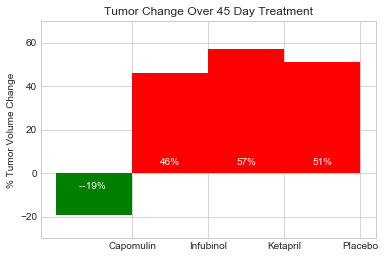

In [27]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (percent_change["Capomulin"], 
               percent_change["Infubinol"], 
               percent_change["Ketapril"], 
               percent_change["Placebo"])


# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Tumor_Change.png")



In [ ]:
# Show the Figure
fig.show()

